In [20]:
import numpy as np
import matplotlib.pyplot as plt
#import resfuncRead as rfr

In [3]:
#read the files (from anthony)
#ptres = rfr.getRFunc('data/jardin_ptres.txt')
#qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

In [148]:
k = 0.157 # from lindhard
q = 1.602*10**-19 #electron charge 
V = 4.0 # voltage Bias
eps = 3.3


 

#for detector 1.

p_alpha = 0.155393
p_beta = 9.60343*10**(-11)
p_gamma = 0.000506287

q_alpha = 0.166004
q_beta = 0.00233716
q_gamma = 9.52576*10**(-5)

In [194]:
x = np.arange(0,100)

Er = 93*np.exp(-x/29) #For NR
#Er = np.random.normal(0, 0.3, 200)
#Er = np.random.exponential(40,np.uint32(1000*0.3))

ER = []
Yield = []
Ran = []
Yl= []


In [45]:
#make the resolution functions (from anthony's code.)
'''
fpt = rfr.makeRFunc(ptres[1]['sqrt'])
fq = rfr.makeRFunc(qres[1]['lin'],True)
fptv = np.vectorize(fpt) # for 
fqv = np.vectorize(fq)
'''

"\nfpt = rfr.makeRFunc(ptres[1]['sqrt'])\nfq = rfr.makeRFunc(qres[1]['lin'],True)\nfptv = np.vectorize(fpt) # for \nfqv = np.vectorize(fq)\n"

In [195]:
for i in np.arange(0,10000):
    
    Enr = np.random.choice(Er)
    Ran.append(E)
    
    sig_p = np.sqrt(p_alpha + p_beta*Enr + p_gamma*(Enr**2))
    sig_q = np.sqrt(q_alpha + q_beta*Enr + q_gamma*(Enr**2))
    
    esp = 11.5*Enr*(23)**-(7/3)
    g = 3*esp**(0.15)+0.7*esp**(0.6)+esp
    Y = k*g/(1+k*g)
    Yl.append(Y)
    
    
    
    #Ft = 1/np.sqrt(2*3.14*sig_p**2)*np.exp(-(x-(1+Y*(q*V/0.036))*Er)**2/2*sig_p**2)#equation 5.2
    Fnr = np.random.normal(0.0,sig_p)

    
    #Fq = 1/np.sqrt(2*3.14*sig_q**2)*np.exp(-(x-0.3*Er)**2/2*sig_q**2)# equation 5.23
    Fq = np.random.normal(0.0,sig_q)
    

    
    Ptnr = (Y*Enr*V)/eps + Enr
    Ptnr = Ptnr + Fnr 
    
    Qnr = Y*Enr
    Qnr1 = Qnr + Fq 
    
    
    Ernr = Ptnr - (V/eps)*Qnr1
    ER.append(Ernr)

    yield1 = Qnr1 / Ernr
    Yield.append(yield1)
    

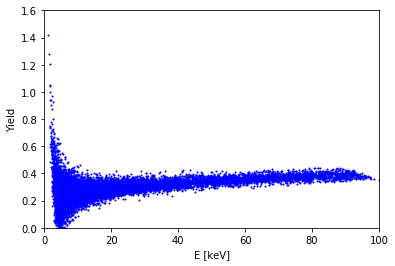

In [196]:
#plot 


plt.plot(ER,Yield,'o',color='b',linewidth=2,markersize=1)
plt.ylim(0,1.6)
plt.xlim(0,100)
plt.xlabel('E [keV]')
plt.ylabel('Yield')
plt.show()
